In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

## Cargar dataset y dividir en 40% train 40% validation y 20% test

In [220]:
# Cargar dataset
datos = pd.read_csv('Valhalla23.csv')

# Definir semilla
semilla = 2992
random.seed(semilla)

# Dividir en subsets
X = datos[['Celsius']]
y = datos['Valks']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=semilla)

## Modelo base

In [221]:
# Se crea el objeto del modelo y se entrena
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter= 10000000, eta0 = 1e-4, random_state = semilla, penalty= None)
model.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, max_iter=10000000, penalty=None, random_state=2992)

### Error cuadratico medio

In [222]:
from sklearn.metrics import mean_squared_error

# Error de datos de entrenamiento 
y_train_pred = model.predict(X_train)
MSE_train = mean_squared_error(y_train, y_train_pred)
print('MSE train=', MSE_train)

# Error de datos de validacion 
y_val_pred = model.predict(X_val)
MSE_val = mean_squared_error(y_val, y_val_pred)
print('MSE val=', MSE_val)

# Error de datos de entrenamiento 
y_test_pred = model.predict(X_test)
MSE_test = mean_squared_error(y_test, y_test_pred)
print('MSE test=', MSE_test)

MSE train= 1140.8513979184747
MSE val= 1052.4601285152605
MSE test= 1278.414945946573


### Gráfica

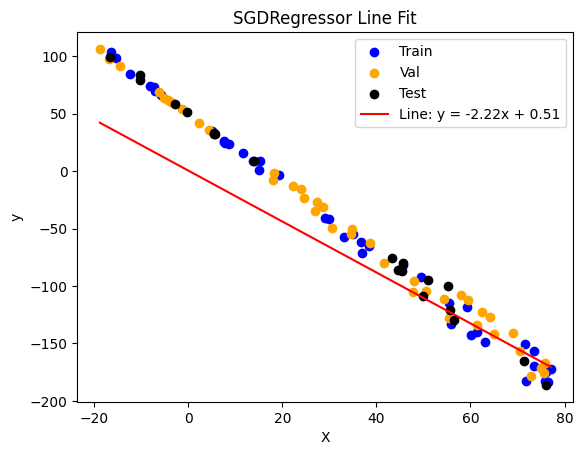

In [223]:
# Crear los datos para la recta
slope = model.coef_[0]
intercept = model.intercept_[0]
X_plot = np.linspace(X.min(), X.max(), 100)  # 100 points for a smooth line
y_plot = slope * X_plot + intercept

# Graficar los datos
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_val, y_val, color='orange', label='Val')
plt.scatter(X_test, y_test, color='black', label='Test')

# Graficar la recta
plt.plot(X_plot, y_plot, color='red', label=f'Line: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('SGDRegressor Line Fit')
plt.legend()

plt.show()

## Prueba con múltiples modelos

In [195]:
cant_datos = np.linspace(2, 39, 20).astype(int)
errores_train_prom = []
errores_val_prom = []
errores_train_std = []
errores_val_std = []

train_index = list(X_train.index)

for i in cant_datos:
    errores_train = np.zeros(100)
    errores_val = np.zeros(100)
    
    for k in range(100):
        # Selección aleatoria de índices
        train_index_i = random.sample(range(len(X_train)), i)
        
        # Crear subconjuntos de entrenamiento y validación
        X_train_i = X_train.iloc[train_index_i]
        y_train_i = y_train.iloc[train_index_i]

        model = SGDRegressor(max_iter=1000000, eta0=1e-4, random_state=semilla, penalty= None)
        model.fit(X_train_i, y_train_i)

        # Predecir en el subconjunto de entrenamiento y validación
        y_train_pred = model.predict(X_train_i)
        y_val_pred = model.predict(X_val)
        
        # Calcular el error cuadrático medio
        errores_train[k] = mean_squared_error(y_train_i, y_train_pred)
        errores_val[k] = mean_squared_error(y_val, y_val_pred)
    
    # Promedio y desviación estándar de los errores
    errores_train_prom.append(np.mean(errores_train))
    errores_val_prom.append(np.mean(errores_val))
    errores_train_std.append(np.std(errores_train))
    errores_val_std.append(np.std(errores_val))

# Agregar errores base
errores_train_prom.append(MSE_train)
errores_val_prom.append(MSE_val)
errores_train_std.append(np.std([MSE_train]))  # Desviación estándar para un solo valor es 0
errores_val_std.append(np.std([MSE_val]))      # Desviación estándar para un solo valor es 0

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Subconjunto': cant_datos.tolist() + ['Línea base'],
    'Error_Entrenamiento': errores_train_prom,
    'Error_Validacion': errores_val_prom,
    'STD_Entrenamiento': errores_train_std,
    'STD_Validacion': errores_val_std
})

print(resultados)

   Subconjunto  Error_Entrenamiento  Error_Validacion  STD_Entrenamiento  \
0            2           180.212423       5155.204524         105.688800   
1            3           205.074417       1020.083286         101.120961   
2            5           120.401793        213.002744          49.083920   
3            7           401.777448        529.410428         418.763064   
4            9           328.099899        403.666770         413.749875   
5           11           406.158374        493.938731         441.956331   
6           13           608.985834        656.343954         479.415801   
7           15           350.699960        382.206798         439.871878   
8           17           675.012573        688.067884         487.987883   
9           19           641.207631        660.300300         482.938053   
10          21           920.283261        892.991153         393.760947   
11          23           828.224962        805.250138         457.770172   
12          

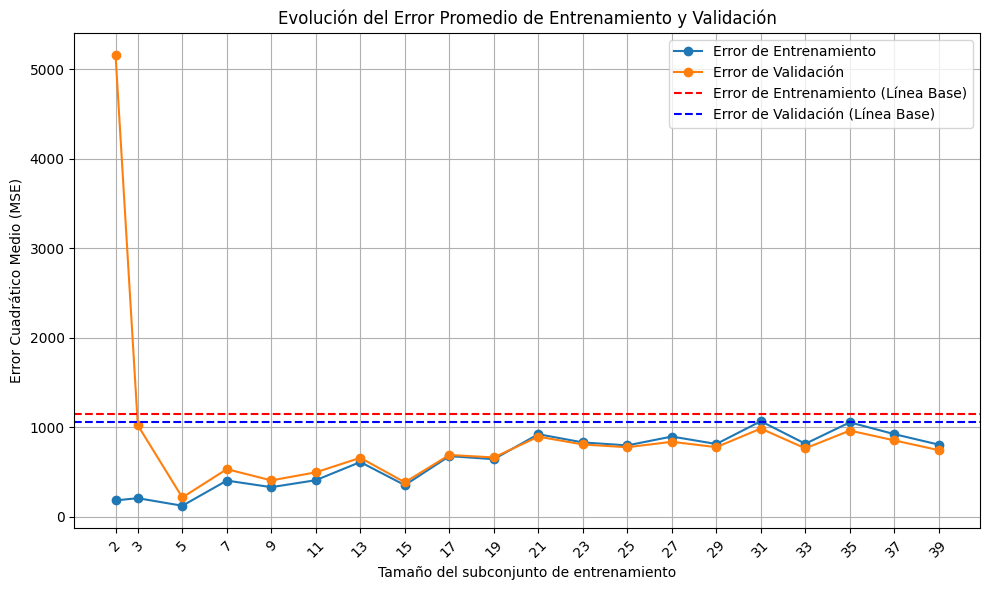

In [196]:
# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los errores de entrenamiento
plt.plot(cant_datos, errores_train_prom[:-1], label='Error de Entrenamiento', marker='o')

# Graficar los errores de validación
plt.plot(cant_datos, errores_val_prom[:-1], label='Error de Validación', marker='o')

# Graficar los errores de la línea base
plt.axhline(y=errores_train_prom[-1], color='r', linestyle='--', label='Error de Entrenamiento (Línea Base)')
plt.axhline(y=errores_val_prom[-1], color='b', linestyle='--', label='Error de Validación (Línea Base)')

# Añadir etiquetas y leyenda
plt.xlabel('Tamaño del subconjunto de entrenamiento')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Evolución del Error Promedio de Entrenamiento y Validación')
plt.legend()
plt.grid(True)
plt.xticks(cant_datos, rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

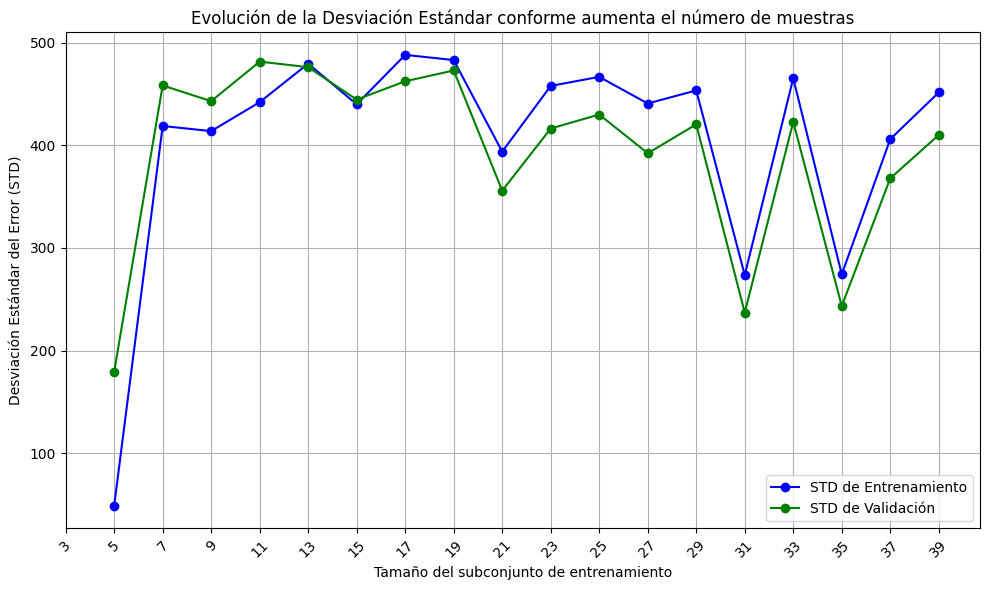

In [199]:
# Crear la gráfica de la desviación estándar
plt.figure(figsize=(10, 6))

# Graficar la desviación estándar de los errores de entrenamiento sin el primer elemento
plt.plot(cant_datos[2:], errores_train_std[2:-1], label='STD de Entrenamiento', marker='o', color='blue')

# Graficar la desviación estándar de los errores de validación sin el primer elemento
plt.plot(cant_datos[2:], errores_val_std[2:-1], label='STD de Validación', marker='o', color='green')

# Agregar etiquetas y leyenda
plt.xlabel('Tamaño del subconjunto de entrenamiento')
plt.ylabel('Desviación Estándar del Error (STD)')
plt.title('Evolución de la Desviación Estándar conforme aumenta el número de muestras')
plt.legend()
plt.grid(True)
plt.xticks(cant_datos[1:], rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


### Ajustes obtenidos

En el caso del modelo que utiliza 2 elementos para entrenar se tiene un modelo con underfit, puesto que el error es demasiado grande y no logra hacer predicciones adecuadamente. Por otro lado, cuando tenemos muchos elementos es probable que el modelo no generalice bien y no obtenga buenas soluciones para datos no vistos, esto quiere decir que el modelo sufre de overfit. A lo largo de todos los modelos se tiene un error relativamente grande, esto puede ser debido a que los parámetros seleccionados para entrenar los modelos no son los mejores. 

Con estas condiciones, el modelo que tiene menor error y menor variación es el que utiliza 5 muestras para entrenamiento. 

## Modelo seleccionado

In [208]:
# Selección aleatoria de índices
train_index = random.sample(range(len(X_train)), 5)
        
# Crear subconjuntos de entrenamiento y validación
X_train2 = X_train.iloc[train_index]
y_train2 = y_train.iloc[train_index]
model2 = SGDRegressor(max_iter= 10000000, eta0 = 1e-4, random_state = semilla, penalty= None)
model2.fit(X_train2, y_train2)

SGDRegressor(eta0=0.0001, max_iter=10000000, penalty=None, random_state=2992)

In [209]:
# Error de datos de entrenamiento 
y_train_pred2 = model2.predict(X_train2)
MSE_train2 = mean_squared_error(y_train2, y_train_pred2)
print('MSE train=', MSE_train2)

# Error de datos de validacion 
y_val_pred2 = model2.predict(X_val)
MSE_val2 = mean_squared_error(y_val, y_val_pred2)
print('MSE val=', MSE_val2)

# Error de datos de entrenamiento 
y_test_pred2 = model2.predict(X_test)
MSE_test2 = mean_squared_error(y_test, y_test_pred2)
print('MSE test=', MSE_test2)

MSE train= 105.4457465101963
MSE val= 146.21118921566705
MSE test= 164.79181742255966


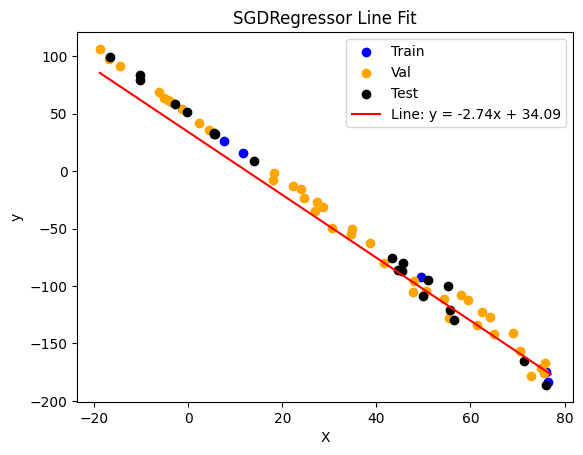

In [210]:
# Crear los datos para la recta
slope = model2.coef_[0]
intercept = model2.intercept_[0]
X_plot = np.linspace(X.min(), X.max(), 100)  # 100 points for a smooth line
y_plot = slope * X_plot + intercept

# Graficar los datos
plt.scatter(X_train2, y_train2, color='blue', label='Train')
plt.scatter(X_val, y_val, color='orange', label='Val')
plt.scatter(X_test, y_test, color='black', label='Test')

# Graficar la recta
plt.plot(X_plot, y_plot, color='red', label=f'Line: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('SGDRegressor Line Fit')
plt.legend()

plt.show()

## Conclusiones

Los errores obtenidos para el modelo que utiliza 5 muestras son entre 100 y 200, mientras que para el modelo base son de aproximadamente 1,000. Esto es debido a los parámetros seleccionados para entrenar los modelos, si reducimos $\alpha$ y la tolerancia, el modelo que utiliza 40 muestras obtendría menor error ya que sería capaz de converger en mejores valores para todos los pesos $\theta$, sin embargo, con estas condiciones, el que utiliza 5 es el que logra obtener una mejor solución.